<a href="https://colab.research.google.com/github/IsaiahejWashington/MLA_IEW/blob/main/MLA1_IEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1
Isaiah Washington
CS430-ON
Machine Learning in the Cloud

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/cs405/weather_2012.csv')

In [25]:
df.head(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [26]:
df.tail(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [27]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
125,1/6/2012 5:00,-11.8,-16.0,71,19,2.8,100.61,Snow
7943,11/26/2012 23:00,-5.8,-9.7,74,4,25.0,101.94,Clear
1477,3/2/2012 13:00,-4.6,-6.5,87,13,4.8,101.09,Snow
951,2/9/2012 15:00,2.4,-6.2,53,24,48.3,101.03,Clear
7980,11/28/2012 12:00,1.0,-6.4,58,9,24.1,101.55,Cloudy


In [31]:
pd.set_option('display.max_columns', None)
df

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [52]:
df.rename(columns={'Date/Time': 'date_time', 'Temp (C)': 'temp_c', 'Dew Point Temp (C)': 'dew_point', 'Rel Hum (%)': 'relative_humidity', 'Wind Spd(km/h)': 'wind_speed', 'Visibility (km)': 'visibility', 'Stn Press (kPa)': 'pressure', 'Weather': 'weather'}, inplace=True)

In [53]:
df.describe()

,temp_f,temp_c,dew_point,relative_humidity,Wind Spd (km/h),visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,47.836660,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,21.038189,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-9.940000,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,32.180000,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,48.740000,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,65.840000,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,91.400000,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


I am not sure why but I could not get "Wind Speed(km/h) to convert to "wind_speed". I am lost as to why that column title will not convert.

In [54]:
df['temp_f'] = (df['temp_c'] * 9/5) + 32

In [55]:
columns = df.columns.tolist()
temp_c_index = columns.index('temp_c')
columns.insert(temp_c_index, columns.pop(columns.index('temp_f')))
df = df[columns]

In [56]:
df.dtypes

,0
Date_Time,object
temp_c,float64
temp_f,float64
dew_point,float64
relative_humidity,int64
Wind Spd (km/h),int64
visibility,float64
pressure,float64
weather,object


In [68]:
df.Date_Time = pd.to_datetime(df.Date_Time)
print(df['Date_Time'].dtype)



datetime64[ns]


In [70]:
df.Date_Time = pd.to_datetime(df.Date_Time)
df['month'] = df['Date_Time'].dt.month
monthly_avg = df.groupby('month')['temp_f'].mean()
print(monthly_avg)

month
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64


<Axes: xlabel='temp_f', ylabel='relative_humidity'>

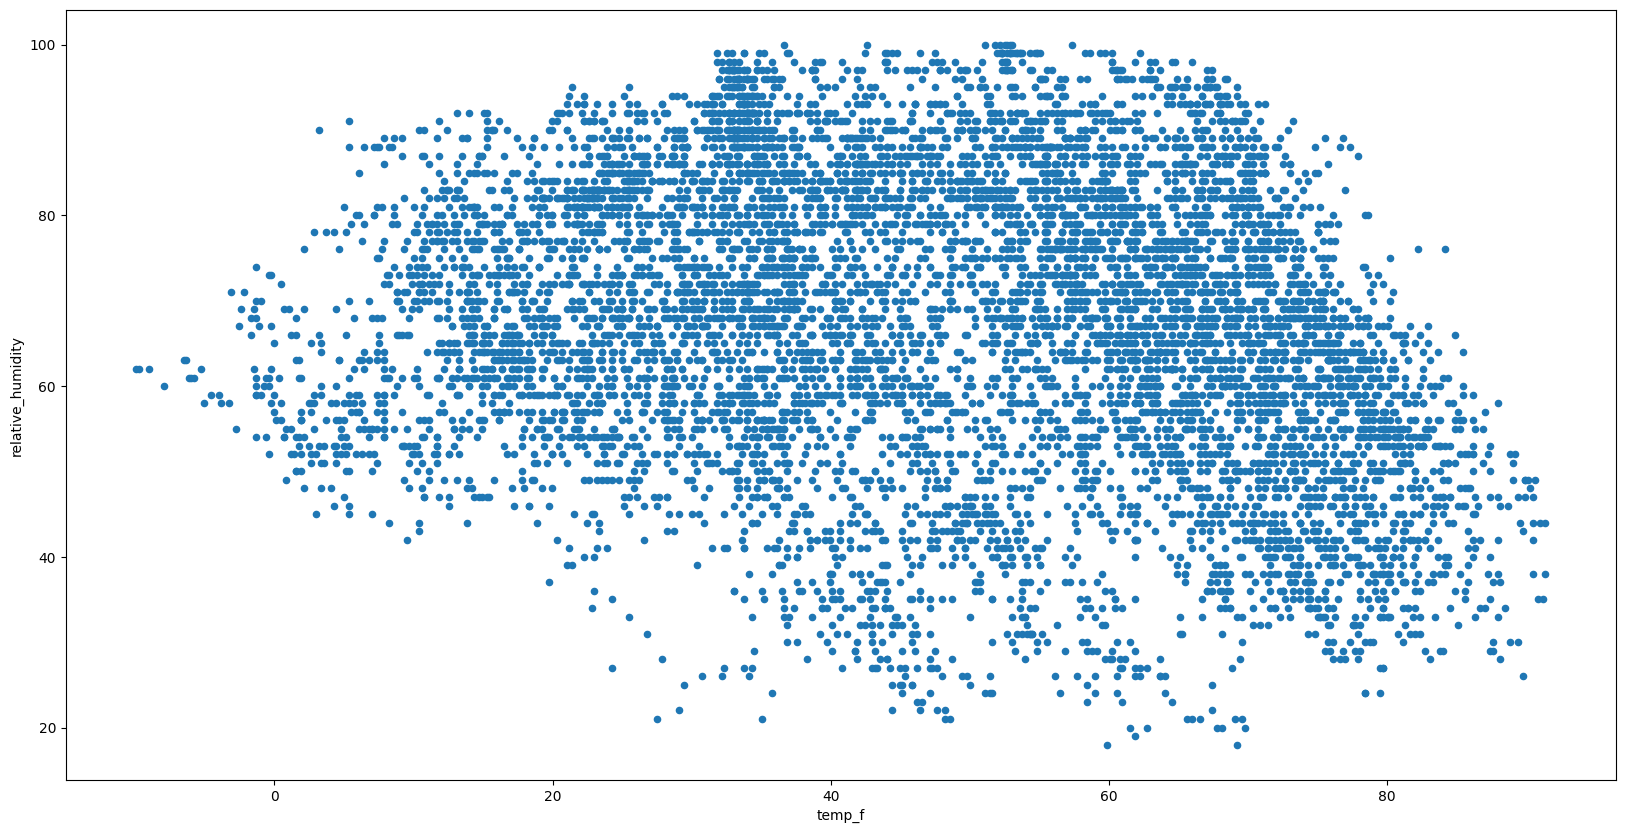

In [71]:
df.plot(kind='scatter',x='temp_f',y='relative_humidity',figsize=(20,10))

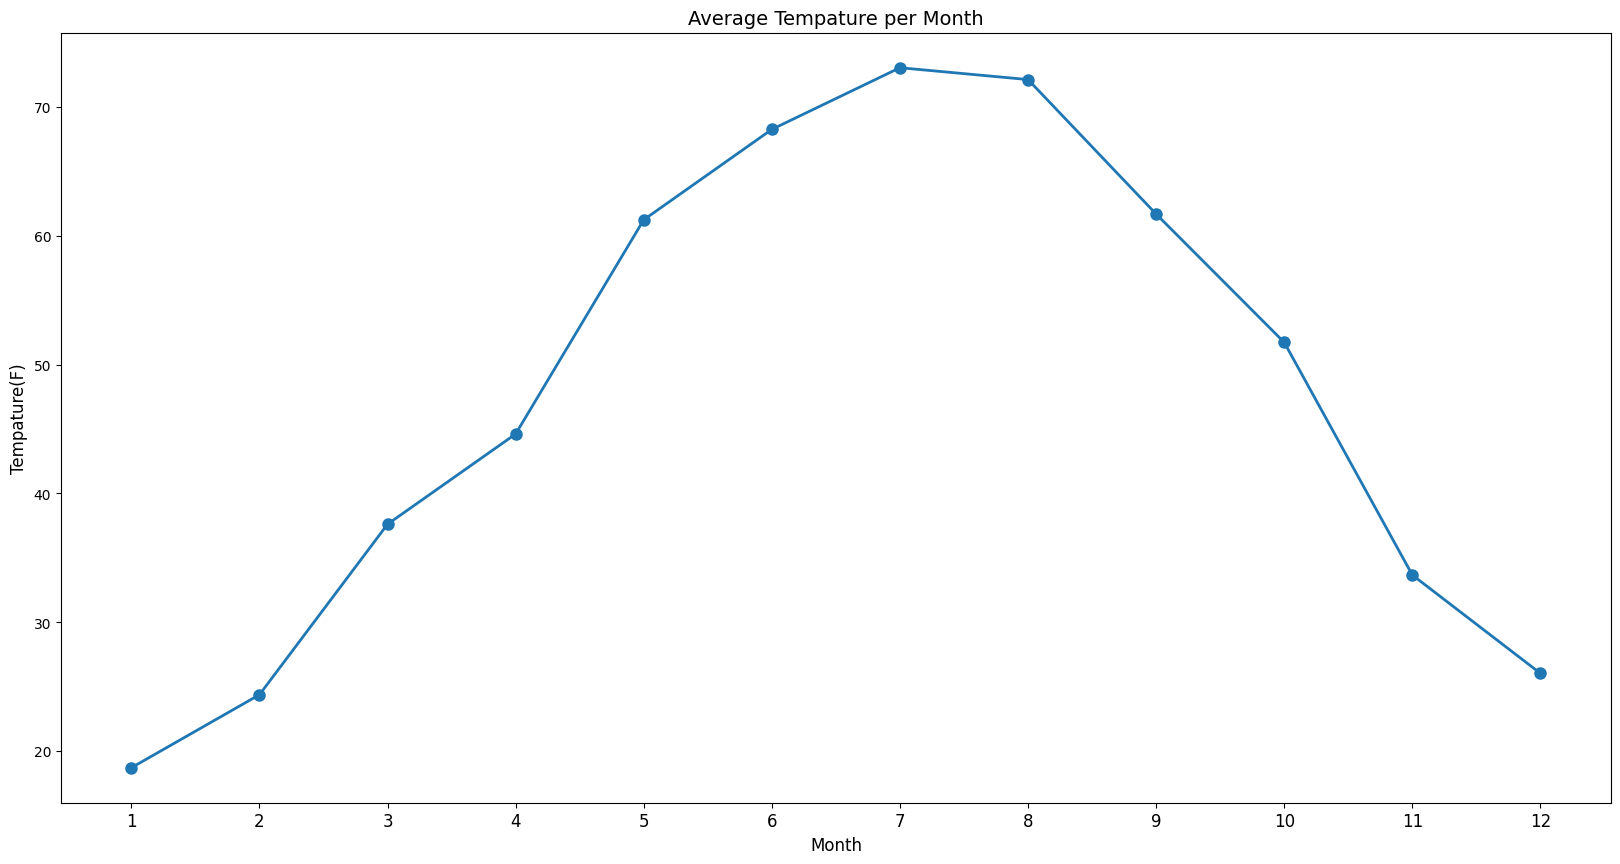

In [76]:
df.Date_Time = pd.to_datetime(df.Date_Time)
df['month'] = df['Date_Time'].dt.month
monthly_avg = df.groupby('month')['temp_f'].mean()
plt.figure(figsize=(20, 10))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Tempature(F)', fontsize=12)
plt.title('Average Tempature per Month', fontsize=14)
plt.xticks(monthly_avg.index, fontsize = 12)
plt.show()



<Axes: >

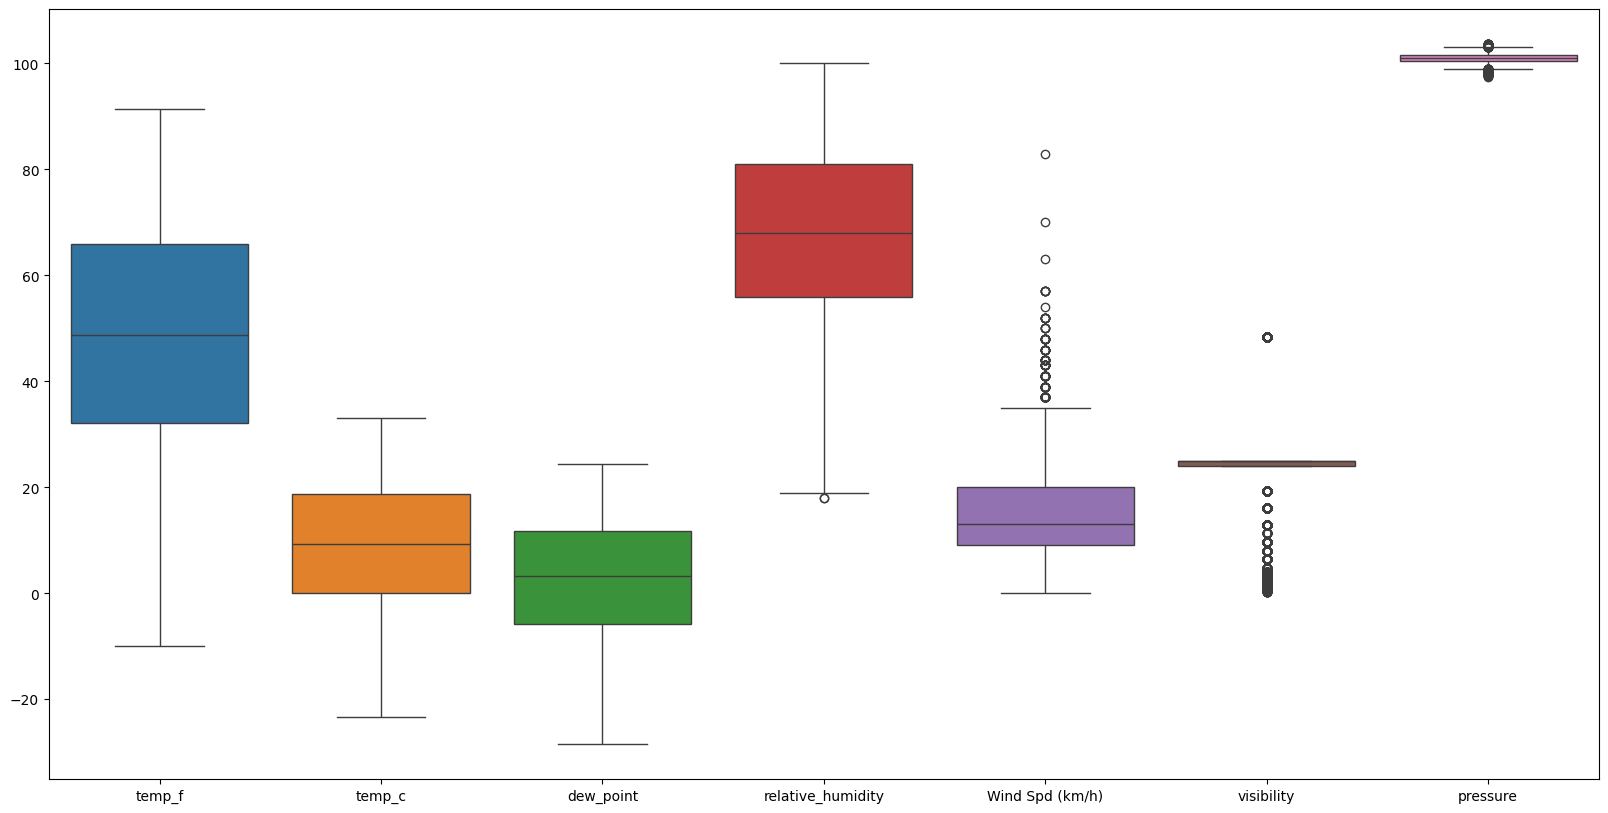

In [80]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data=df[['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'Wind Spd (km/h)', 'visibility', 'pressure']])

